In [ ]:
import numpy as np
np.random.seed(42)

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import torch
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
import time

In [ ]:
df = pd.read_excel('./Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')

In [ ]:
# Show the first 5 rows of the date fruit dataframe
df.head(5)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [ ]:
# Describe the original dataset
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [ ]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

<Axes: xlabel='Class', ylabel='count'>

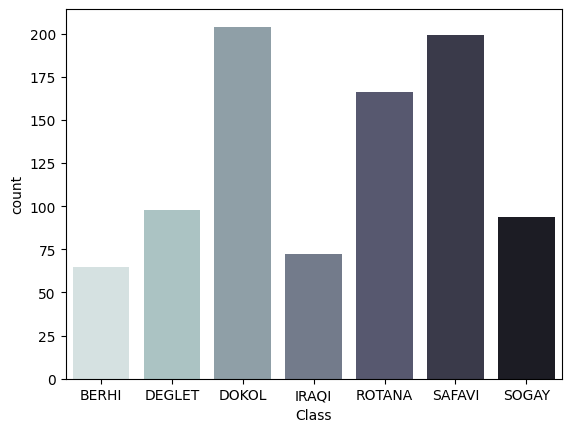

In [ ]:
# Count of each class
sns.countplot(data=df, x='Class', palette='bone_r')

<Axes: xlabel='AREA', ylabel='Class'>

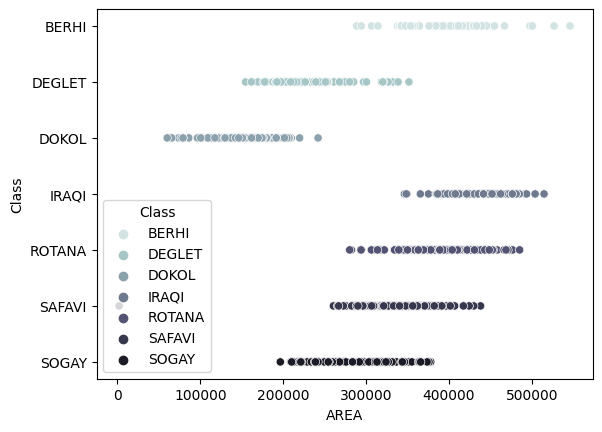

In [ ]:
# Scatterplot for the area of different date fruit
sns.scatterplot(x=df['AREA'],y=df['Class'],hue=df['Class'],palette='bone_r')

<Axes: xlabel='PERIMETER', ylabel='Class'>

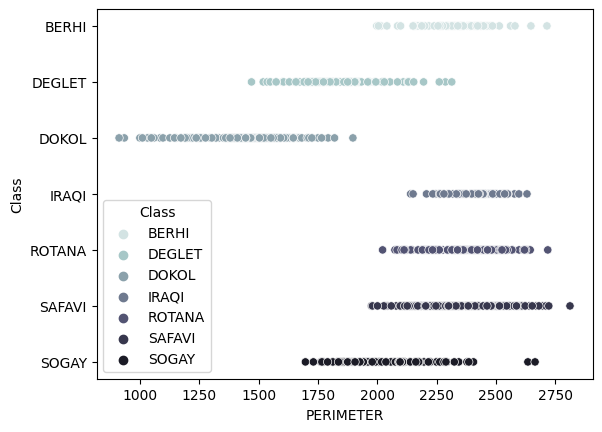

In [ ]:
# Scatterplot for the perimeter of different date fruit
sns.scatterplot(x=df['PERIMETER'],y=df['Class'],hue=df['Class'],palette='bone_r')

Data Cleaning

In [ ]:
from scipy.stats import zscore

# Calculate the median value of each class
medians_by_class = df.groupby('Class').median()

# Implement each row of dataset
for index, row in df.iterrows():
    # Get the corresponding class value
    current_class = row['Class']
    
    # Get the median of the class
    medians = medians_by_class.loc[current_class]

    # Outlier detection for the value of each feature
    for column in df.columns:
        if column != 'Class':
            # Calculating the Z-score
            z_scores = zscore(df.loc[df['Class'] == current_class, column])
            z_scores_series = pd.Series(z_scores, index=df.loc[df['Class'] == current_class].index)
            current_z_score = z_scores_series.loc[index]

            # If the absolute value of the Z-score is greater than 2.5, we consider it to be an outlier
            if abs(current_z_score) > 2.5:
                # Replace the outlier with the median of the feature
                df.at[index, column] = medians[column]

Feature Selection

In [17]:
# Drop the target column
X_data = df.drop(['Class'], axis=1).values
y_data = df.Class.values

In [18]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [19]:
# feature importances in RF
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
importances = clf.feature_importances_

# output of feature importances
features = df.drop(['Class'], axis=1).columns
importance_df = pd.DataFrame({'features': features, 'importances': importances})
print(importance_df.sort_values(by='importances', ascending=False))

         features  importances
3      MINOR_AXIS     0.084422
5         EQDIASQ     0.064560
16         MeanRR     0.064387
7     CONVEX_AREA     0.061065
31     ALLdaub4RR     0.058116
0            AREA     0.050829
17         MeanRG     0.048958
1       PERIMETER     0.046529
29      EntropyRG     0.044837
24         SkewRB     0.041367
12  SHAPEFACTOR_1     0.038235
32     ALLdaub4RG     0.037478
28      EntropyRR     0.035493
23         SkewRG     0.031799
27     KurtosisRB     0.024037
10      ROUNDNESS     0.022766
26     KurtosisRG     0.021749
22         SkewRR     0.021320
30      EntropyRB     0.020866
18         MeanRB     0.019304
2      MAJOR_AXIS     0.019060
4    ECCENTRICITY     0.015486
33     ALLdaub4RB     0.015293
11    COMPACTNESS     0.014297
13  SHAPEFACTOR_2     0.013063
6        SOLIDITY     0.012460
9    ASPECT_RATIO     0.012038
15  SHAPEFACTOR_4     0.009762
25     KurtosisRR     0.009569
8          EXTENT     0.009360
14  SHAPEFACTOR_3     0.009023
20      

In [20]:
# select the top k most important features
k = 32
selector = SelectKBest(f_classif, k=k)
selector.fit(X_data, y_data)
selected_features = df.drop(['Class'], axis=1).columns[selector.get_support()]
print(f"Selected {k} features：", selected_features)

Selected 32 features： Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'ASPECT_RATIO', 'ROUNDNESS',
       'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3',
       'MeanRR', 'MeanRG', 'MeanRB', 'StdDevRR', 'StdDevRG', 'StdDevRB',
       'SkewRR', 'SkewRG', 'SkewRB', 'KurtosisRR', 'KurtosisRG', 'KurtosisRB',
       'EntropyRR', 'EntropyRG', 'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG',
       'ALLdaub4RB'],
      dtype='object')


Data preprocessing

In [ ]:
# Drop the target and the 2 least important columns
X_data = df.drop(['Class', 'StdDevRR', 'StdDevRB'], axis=1).values
y_data = df.Class.values

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [ ]:
# Scaling the data using standard scaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)
print(X_train.shape, X_test.shape)

(718, 32) (180, 32)


In [ ]:
# Encoding the data to get the target's label
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
print(y_train.shape, y_test.shape)

(718,) (180,)


Hyperparameter Tuning

In [ ]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
}

# explore 100 random combinations of hyperparameters
random_search = RandomizedSearchCV(rf, param_grid, scoring='accuracy', cv=5, n_jobs=-1, n_iter=100, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters:  {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
Best score:  0.9122766122766123
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.71      0.85      0.77        20
           2       1.00      0.92      0.96        50
           3       0.71      1.00      0.83        10
           4       1.00      0.97      0.99        35
           5       1.00      1.00      1.00        33
           6       0.81      0.85      0.83        20

    accuracy                           0.92       180
   macro avg       0.89      0.89      0.88       180
weighted avg       0.93      0.92      0.92       180



In [ ]:
svc = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'coef0': [0, 1, 2],
    'shrinking': [True, False],
    'probability': [True, False],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],
    'class_weight': [None, 'balanced'],
}

# explore 100 random combinations of hyperparameters
random_search = RandomizedSearchCV(svc, param_grid, scoring='accuracy', cv=5, n_jobs=-1, n_iter=100, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

best_svc = random_search.best_estimator_
y_pred = best_svc.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters:  {'tol': 0.1, 'shrinking': True, 'probability': True, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0, 'class_weight': None, 'C': 10}
Best score:  0.934547397047397
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.78      0.90      0.84        20
           2       1.00      0.98      0.99        50
           3       0.90      0.90      0.90        10
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33
           6       0.89      0.80      0.84        20

    accuracy                           0.95       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.95      0.95      0.95       180



In [ ]:
mlp = MLPClassifier(random_state=42)

param_grid = {
    'hidden_layer_sizes': [(100,), (150,), (200,), (50, 50), (100, 100), (64, 32, 16)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 600, 1000],
    'early_stopping': [True, False]
}

# explore 50 random combinations of hyperparameters
random_search = RandomizedSearchCV(mlp, param_grid, scoring='accuracy', cv=5, n_jobs=-1, n_iter=50, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

best_mlp = random_search.best_estimator_
y_pred = best_mlp.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters:  {'solver': 'adam', 'max_iter': 200, 'learning_rate': 'constant', 'hidden_layer_sizes': (150,), 'early_stopping': False, 'alpha': 0.1, 'activation': 'relu'}
Best score:  0.9331487956487956
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.75      0.90      0.82        20
           2       1.00      0.96      0.98        50
           3       0.90      0.90      0.90        10
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33
           6       0.89      0.80      0.84        20

    accuracy                           0.94       180
   macro avg       0.92      0.93      0.92       180
weighted avg       0.95      0.94      0.95       180



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#Hyperparameter Tuning for KNN
# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters search space
param_dist = {
    'n_neighbors': list(range(1, 51)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=50, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found:", best_params)

# Evaluate the model with the best parameters on the test set
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'weights': 'distance', 'p': 2, 'n_neighbors': 14, 'metric': 'euclidean'}
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.82      0.90      0.86        20
           2       0.98      0.98      0.98        50
           3       0.90      0.90      0.90        10
           4       0.97      1.00      0.99        35
           5       1.00      1.00      1.00        33
           6       0.94      0.80      0.86        20

    accuracy                           0.95       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.95      0.95      0.95       180



In [ ]:
# Hyperparameter Tuning for LR

# Define the feature matrix and target vector
X = df[['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY', 'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO', 'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB', 'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB', 'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG', 'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']]
y = df['Class']

# Create a logistic regression model
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')

# Set up the hyperparameter search space
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
}

# Perform randomized search cross-validation
random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=50, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters: ", best_params)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

#Print the results
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters:  {'penalty': 'l1', 'C': 4.281332398719396}
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.76      0.80      0.78        20
           2       0.98      0.98      0.98        50
           3       0.90      0.90      0.90        10
           4       0.94      0.94      0.94        35
           5       1.00      1.00      1.00        33
           6       0.79      0.75      0.77        20

    accuracy                           0.92       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.92      0.92      0.92       180

Confusion Matrix:
 [[11  0  0  1  0  0  0]
 [ 0 16  1  0  1  0  2]
 [ 0  1 49  0  0  0  0]
 [ 1  0  0  9  0  0  0]
 [ 0  0  0  0 33  0  2]
 [ 0  0  0  0  0 33  0]
 [ 0  4  0  0  1  0 15]]
Accuracy Score:  0.9222222222222223


Decision Tree with Hyperparameter Tuning
Best Hyperparameters: {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 8}
Best Validation Accuracy: 0.8370532245532246
Time consumed: 0.021767377853393555
Test Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.60      0.75      0.67        20
           2       1.00      0.98      0.99        50
           3       0.75      0.60      0.67        10
           4       0.97      0.86      0.91        35
           5       0.97      0.88      0.92        33
           6       0.68      0.75      0.71        20

    accuracy                           0.85       180
   macro avg       0.80      0.80      0.79       180
weighted avg       0.87      0.85      0.86       180



<Axes: >

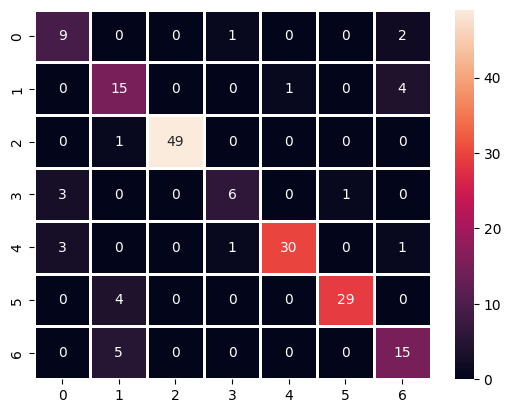

In [ ]:
#Hyperparamete tuning for DT
params = {'max_depth': range(1, 11),
          'min_samples_split': range(2, 11),
          'min_samples_leaf': range(1, 6),}
random_search = RandomizedSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=42),
                                   param_distributions=params, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
best_dt = random_search.best_estimator_

# Model training and evaluation using the best hyperparameters
start = time.time()
best_dt.fit(X_train, y_train)
test_pred = best_dt.predict(X_test)
end = time.time()
dt_train_time = end - start
test_acc = accuracy_score(y_test,test_pred)

print("Decision Tree with Hyperparameter Tuning")
print("Best Hyperparameters:", random_search.best_params_)
print("Best Validation Accuracy:", random_search.best_score_)
print("Time consumed:", dt_train_time)
print('Test Accuracy:', test_acc)
print(classification_report(y_test, test_pred))
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, linewidths=2, linecolor='white')

XGBoost with Hyperparameter Tuning
Time consumed: 21.869431495666504
Best Parameters: {'colsample_bytree': 0.831261142176991, 'gamma': 0.06234221521788219, 'learning_rate': 0.5300680211778108, 'max_depth': 4, 'n_estimators': 53, 'reg_alpha': 0.09242722776276352, 'reg_lambda': 0.9695846277645586, 'subsample': 0.8875664116805573}
Best Score: 0.9164529914529915
Test Accuracy: 0.9277777777777778
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.71      0.75      0.73        20
           2       0.98      0.96      0.97        50
           3       0.83      1.00      0.91        10
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33
           6       0.80      0.80      0.80        20

    accuracy                           0.93       180
   macro avg       0.90      0.91      0.90       180
weighted avg       0.93      0.93      0.93       180



<Axes: >

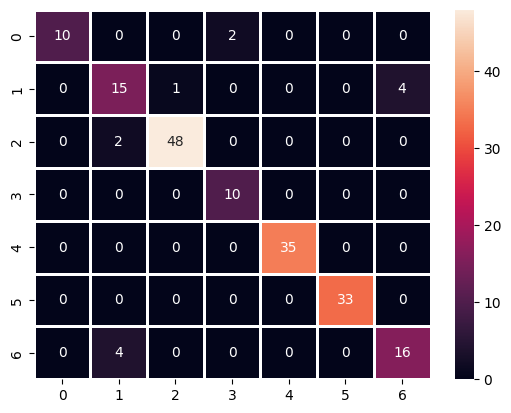

In [ ]:
#Hyperparameter tuning for XGB
xgb = XGBClassifier()

# define the hyperparameters to tune
param_dist = {
    'max_depth': randint(3, 7),
    'learning_rate': uniform(0.01, 1),
    'n_estimators': randint(50, 150),
    'gamma': uniform(0, 0.2),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(0, 1)
}

# create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, cv=5, n_jobs=-1)

# fit the model to the training data
start = time.time()
random_search.fit(X_train, y_train)
end = time.time()
xgb_train_time = end - start

# get the best hyperparameters and the corresponding accuracy score
best_params = random_search.best_params_
best_score = random_search.best_score_

# evaluate the model on the test set using the best hyperparameters
test_pred = random_search.predict(X_test)
test_acc = accuracy_score(y_test,test_pred)

print("XGBoost with Hyperparameter Tuning")
print("Time consumed:", xgb_train_time)
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print('Test Accuracy:', test_acc)
print(classification_report(y_test, random_search.predict(X_test)))
sns.heatmap(confusion_matrix(y_test,random_search.predict(X_test)),annot=True,linewidths=2,linecolor='white')

Model Training

In [ ]:
# training and evaluating with test set
models = [
    [('RandomForest', RandomForestClassifier())],
    [('SVC', SVC())],
    [('MLP', MLPClassifier((64, 32, 16), max_iter=1000))]
]

results = []
for model in models:
  name = model[0][0]
  model = model[0][1]

  # model training
  start_time = time.time()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  end_time = time.time()

  cm = confusion_matrix(y_test, y_pred)
  cr = classification_report(y_test, y_pred)
  t = end_time - start_time

  results.append((cm, cr, t))

In [ ]:
# training and evaluating with training set used for overfitting test
results_train = []
for model in models:
  name = model[0][0]
  model = model[0][1]

  # model training
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)

  accuracy_train = accuracy_score(y_train, y_train_pred)
  results_train.append(accuracy_train)

In [ ]:
# result of linear SVC model
start_time = time.time()
svc_linear = SVC(kernel = 'linear').fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)
end_time = time.time()

report_svc_linear = classification_report(y_test, y_pred_linear)
t_svc_linear = end_time - start_time
cm_svc_linear = confusion_matrix(y_test, y_pred_linear)

Results visualisations

Random Forest Classifier

In [ ]:
print('Time consumed:', results[0][2])

Time consumed: 0.3501551151275635


In [ ]:
print(results[0][1])

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.71      0.85      0.77        20
           2       1.00      0.94      0.97        50
           3       0.69      0.90      0.78        10
           4       1.00      0.97      0.99        35
           5       1.00      1.00      1.00        33
           6       0.80      0.80      0.80        20

    accuracy                           0.91       180
   macro avg       0.87      0.88      0.87       180
weighted avg       0.92      0.91      0.91       180



<Axes: >

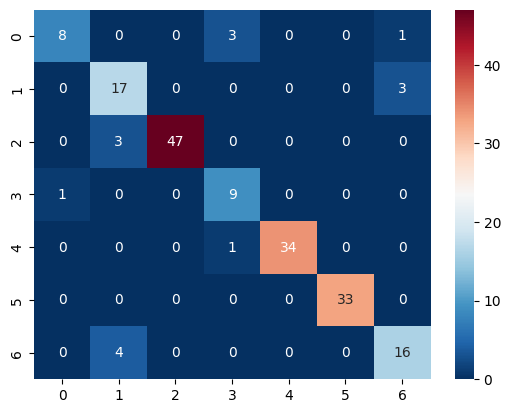

In [ ]:
sns.heatmap(results[0][0], cmap='RdBu_r', annot=True)

In [ ]:
print('The accuracy of y_train and prediction of X_train:', results_train[0])

The accuracy of y_train and prediction of X_train: 1.0


Support Vector Classification

In [ ]:
print('Time consumed:', results[1][2])

Time consumed: 0.014842987060546875


In [ ]:
print(results[1][1])

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.90      0.90      0.90        20
           2       1.00      0.98      0.99        50
           3       0.82      0.90      0.86        10
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33
           6       0.90      0.95      0.93        20

    accuracy                           0.96       180
   macro avg       0.93      0.94      0.93       180
weighted avg       0.96      0.96      0.96       180



<Axes: >

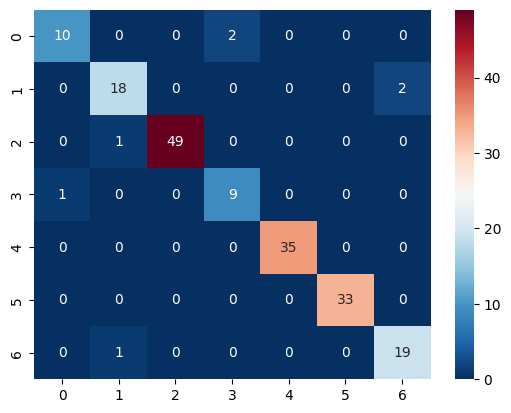

In [ ]:
sns.heatmap(results[1][0], cmap='RdBu_r', annot=True)

In [ ]:
print('The accuracy of y_train and prediction of X_train:', results_train[1])

The accuracy of y_train and prediction of X_train: 0.9442896935933147


Linear SVC

In [ ]:
print('Time consumption of linear svc model:', t_svc_linear)

Time consumption of linear svc model: 0.012333154678344727


In [ ]:
print(report_svc_linear)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.72      0.90      0.80        20
           2       1.00      0.94      0.97        50
           3       0.90      0.90      0.90        10
           4       1.00      0.97      0.99        35
           5       1.00      1.00      1.00        33
           6       0.84      0.80      0.82        20

    accuracy                           0.93       180
   macro avg       0.91      0.92      0.91       180
weighted avg       0.94      0.93      0.94       180



<Axes: >

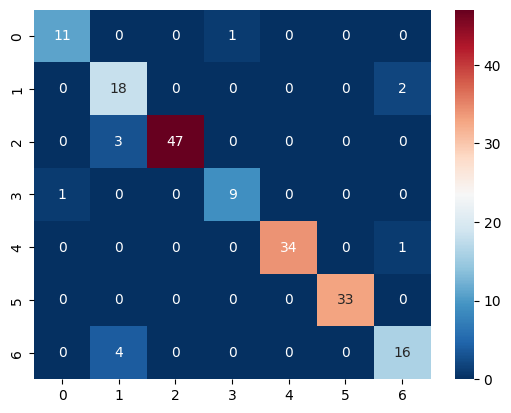

In [ ]:
sns.heatmap(cm_svc_linear, cmap='RdBu_r', annot=True)

Multilayer perceptron

In [ ]:
print('Time consumed:', results[2][2])

Time consumed: 4.500519037246704


In [ ]:
print(results[2][1])

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.86      0.90      0.88        20
           2       1.00      1.00      1.00        50
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33
           6       0.89      0.85      0.87        20

    accuracy                           0.97       180
   macro avg       0.95      0.95      0.95       180
weighted avg       0.97      0.97      0.97       180



<Axes: >

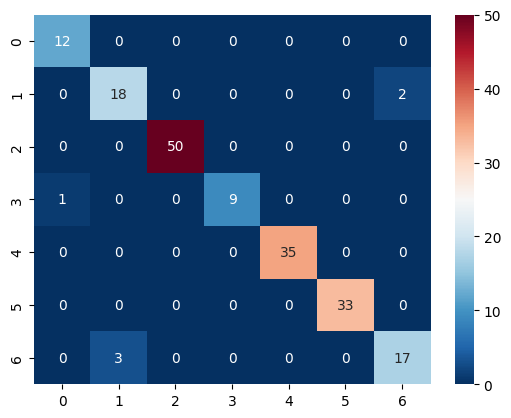

In [ ]:
sns.heatmap(results[2][0], cmap='RdBu_r', annot=True)

In [ ]:
print('The accuracy of y_train and prediction of X_train:', results_train[2])

The accuracy of y_train and prediction of X_train: 1.0


Decision Tree

Decision Tree
Time consumed: 0.03326988220214844
Test Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.76      0.65      0.70        20
           2       0.92      0.98      0.95        50
           3       0.80      0.80      0.80        10
           4       0.86      0.86      0.86        35
           5       1.00      0.97      0.98        33
           6       0.68      0.65      0.67        20

    accuracy                           0.85       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.85      0.85      0.85       180



<Axes: >

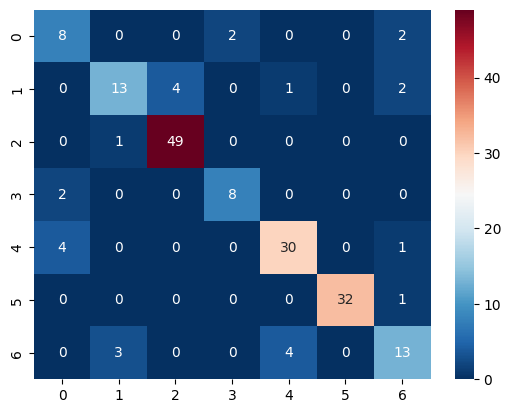

In [ ]:
#DT
dt = DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=42)
start = time.time()
dt.fit(X_train, y_train)
test_pred = dt.predict(X_test)
end = time.time()
dt_train_time = end - start
test_acc = accuracy_score(y_test,test_pred)

print("Decision Tree")
print("Time consumed:", dt_train_time)
print('Test Accuracy:', test_acc)
print(classification_report(y_test, dt.predict(X_test)))
sns.heatmap(confusion_matrix(y_test,dt.predict(X_test)),annot=True, cmap='RdBu_r')

In [ ]:
# overfitting test
train_pred = dt.predict(X_train)
train_acc = accuracy_score(y_train,train_pred)
print('The accuracy of y_train and prediction of X_train:', train_acc)
print(classification_report(y_train, train_pred))

The accuracy of y_train and prediction of X_train: 0.9832869080779945
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        53
           1       1.00      0.99      0.99        78
           2       0.99      1.00      1.00       154
           3       0.93      0.92      0.93        62
           4       1.00      1.00      1.00       131
           5       1.00      1.00      1.00       166
           6       0.99      0.97      0.98        74

    accuracy                           0.98       718
   macro avg       0.97      0.97      0.97       718
weighted avg       0.98      0.98      0.98       718



XGBoost

XGBoost
Time consumed: 0.8075473308563232
Test Accuracy: 0.9388888888888889
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.77      0.85      0.81        20
           2       1.00      0.96      0.98        50
           3       0.77      1.00      0.87        10
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33
           6       0.85      0.85      0.85        20

    accuracy                           0.94       180
   macro avg       0.91      0.92      0.91       180
weighted avg       0.95      0.94      0.94       180



<Axes: >

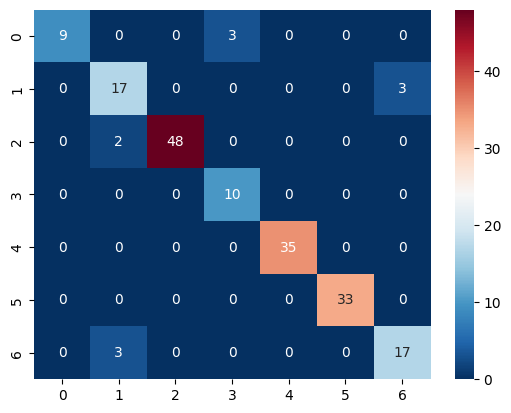

In [ ]:
#XGBoost
xgb = XGBClassifier()
start = time.time()
xgb.fit(X_train, y_train)
 
test_pred = xgb.predict(X_test)
end = time.time()
xgb_train_time = end - start
test_acc = accuracy_score(y_test,test_pred)

print("XGBoost")
print("Time consumed:", xgb_train_time)
print('Test Accuracy:', test_acc)
print(classification_report(y_test, xgb.predict(X_test)))
sns.heatmap(confusion_matrix(y_test,xgb.predict(X_test)), cmap='RdBu_r', annot=True)

In [ ]:
# overfitting test
train_pred = xgb.predict(X_train)
train_acc = accuracy_score(y_train,train_pred)
print('The accuracy of y_train and prediction of X_train:', train_acc)

The accuracy of y_train and prediction of X_train: 1.0


Logistic Regression

Logistic Regression

Time consumed: 0.06933736801147461
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.86      0.90      0.88        20
           2       1.00      1.00      1.00        50
           3       0.90      0.90      0.90        10
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33
           6       0.89      0.85      0.87        20

    accuracy                           0.96       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.96      0.96      0.96       180



<Axes: >

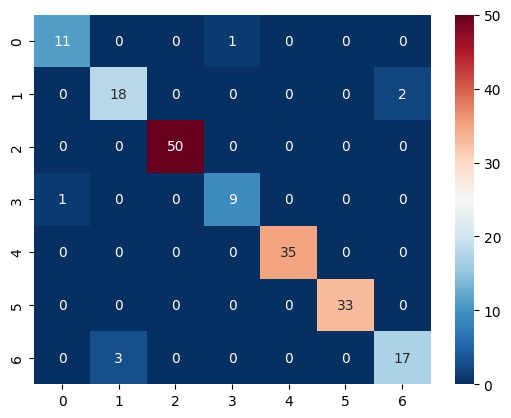

In [ ]:
#Model Training
logr = LogisticRegression(C=1,max_iter=1000,multi_class='auto')
start_time = time.time()
logr.fit(X_train,y_train)
logpred = logr.predict(X_test)
end_time = time.time()
time_consumed = end_time - start_time
print('Logistic Regression' + '\n')
print('Time consumed:',time_consumed)
print(classification_report(y_test,logpred))
sns.heatmap(confusion_matrix(y_test,logpred), cmap='RdBu_r', annot=True)

In [ ]:
# overfitting test
logpred_train = logr.predict(X_train)
acc_lr = accuracy_score(y_train, logpred_train)
print('The accuracy of y_train and prediction of X_train:', acc_lr)

The accuracy of y_train and prediction of X_train: 0.9610027855153204


K-nearest Neighbor

Time consumed: 0.011693239212036133
KNN Classifier

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.80      1.00      0.89        20
           2       1.00      0.96      0.98        50
           3       0.88      0.70      0.78        10
           4       0.97      1.00      0.99        35
           5       1.00      1.00      1.00        33
           6       1.00      0.80      0.89        20

    accuracy                           0.94       180
   macro avg       0.92      0.91      0.91       180
weighted avg       0.95      0.94      0.94       180



<Axes: >

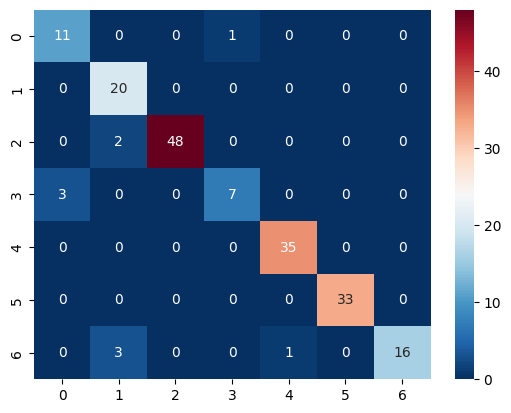

In [ ]:
#KNN
err_rate = [] # Array to save all error rates

for i in range(1,40): # loop to try all error rates from 1 to 40
    knn = KNeighborsClassifier(n_neighbors=i) # create a knn object with number of neighbours with value i
    knn.fit(X_train,y_train) # fit the model
    pred_i = knn.predict(X_test) # predict the value
    err_rate.append(np.mean(pred_i != y_test)) #add the value to the array

knn = KNeighborsClassifier(n_neighbors=4,p=2,n_jobs=-1)
start_time = time.time()
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)
end_time = time.time()
time_consumed = end_time - start_time
print('Time consumed:',time_consumed)
print('KNN Classifier' + '\n')
print(classification_report(y_test,knnpred))
sns.heatmap(confusion_matrix(y_test,knnpred), cmap='RdBu_r', annot=True)

In [ ]:
# overfitting test
knnpred_train = knn.predict(X_train)
acc_knn = accuracy_score(y_train, logpred_train)
print('The accuracy of y_train and prediction of X_train:', acc_knn)

The accuracy of y_train and prediction of X_train: 0.9610027855153204
